In [ ]:
import tensorflow
from tensorflow.keras import *
from tensorflow.keras.models import *
from tensorflow.keras.applications.vgg16 import *

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-10-14 13:11:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  88.6MB/s    in 0.7s    

2021-10-14 13:11:42 (88.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.764.jpg', 'cat.562.jpg', 'cat.234.jpg', 'cat.617.jpg', 'cat.488.jpg', 'cat.552.jpg', 'cat.309.jpg', 'cat.145.jpg', 'cat.241.jpg', 'cat.535.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
from tensorflow.keras.preprocessing.image import *


train_augmentation=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
train_generator= train_augmentation.flow_from_directory(
    directory='/tmp/cats_and_dogs_filtered/train',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'



)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_augmentation=ImageDataGenerator(rescale=1./255)


In [ ]:
validation_generator= validation_augmentation.flow_from_directory(
    directory='/tmp/cats_and_dogs_filtered/validation',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'



)

Found 1000 images belonging to 2 classes.


In [ ]:
conv_base=VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
for layer in conv_base.layers:
  layer.trainable=False

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history=model.fit(train_generator,steps_per_epoch=8,
                  epochs=5,
                  verbose=1,
                  validation_data=validation_generator)

Epoch 1/5
8/8 [==============================] - 73s 4s/step - loss: 3.1602 - accuracy: 0.5061 - val_loss: 0.6310 - val_accuracy: 0.6610
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.6557 - accuracy: 0.5771 - val_loss: 0.5258 - val_accuracy: 0.7770
Epoch 3/5
8/8 [==============================] - 11s 1s/step - loss: 0.6052 - accuracy: 0.6537 - val_loss: 0.4689 - val_accuracy: 0.8040
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.5703 - accuracy: 0.7203 - val_loss: 0.4512 - val_accuracy: 0.8060
Epoch 5/5
8/8 [==============================] - 12s 2s/step - loss: 0.5652 - accuracy: 0.6992 - val_loss: 0.4426 - val_accuracy: 0.8090


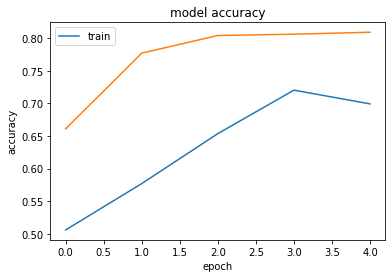

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()


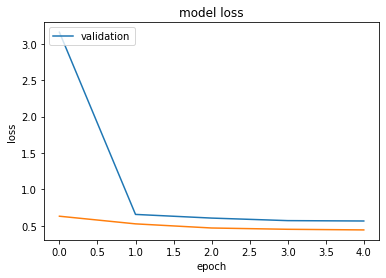

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.legend(['validation'],loc='upper left')

plt.show()